##Import Libraries

In [ ]:
import pandas as pd # to read the file
import numpy as np# to numerical opertains
import seaborn as sns# to plot the graph as graphica representaion
import matplotlib.pyplot as plt # to plot the graph
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split # to train test split the datasets
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix #metrics to find the accuray of the model
from sklearn.ensemble import RandomForestClassifier # to classified the datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Read the Datasets

In [ ]:
diabetes_df= pd.read_csv("/content/drive/MyDrive/bank-data.csv")#to read the dataset as use the pandas

In [ ]:
diabetes_df.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,1,0,17546.0,0,1,0,0,0,0,1
1,40,0,3,30085.1,1,3,1,0,1,1,0
2,51,1,0,16575.4,1,0,1,1,1,0,0
3,23,1,3,20375.4,1,3,0,0,1,0,0
4,57,1,1,50576.3,1,0,0,1,0,0,0


In [ ]:
diabetes_df.tail()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
595,61,1,0,47025.00,0,2,1,1,1,1,0
596,30,1,0,9672.25,1,0,1,1,1,0,0
597,31,1,3,15976.30,1,0,1,1,0,0,1
598,29,0,0,14711.80,1,0,0,1,0,1,0
599,38,0,3,26671.60,0,0,1,0,1,1,1


In [ ]:
# Statistics
diabetes_df.describe()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,42.395000,0.500000,1.231667,27524.031217,0.660000,1.011667,0.493333,0.690000,0.758333,0.348333,0.456667
std,14.424947,0.500417,1.286113,12899.468246,0.474104,1.056752,0.500373,0.462879,0.428451,0.476840,0.498534
min,18.000000,0.000000,0.000000,5014.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,17264.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,42.000000,0.500000,1.000000,24925.300000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,55.250000,1.000000,3.000000,36172.675000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,67.000000,1.000000,3.000000,63130.100000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
column_list= list(diabetes_df.columns)

In [ ]:
column_list

['age',
 'sex',
 'region',
 'income',
 'married',
 'children',
 'car',
 'save_act',
 'current_act',
 'mortgage',
 'pep']

In [ ]:
#Shape of the data

diabetes_df.shape

(600, 11)

### Check null values

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          600 non-null    int64  
 1   sex          600 non-null    int64  
 2   region       600 non-null    int64  
 3   income       600 non-null    float64
 4   married      600 non-null    int64  
 5   children     600 non-null    int64  
 6   car          600 non-null    int64  
 7   save_act     600 non-null    int64  
 8   current_act  600 non-null    int64  
 9   mortgage     600 non-null    int64  
 10  pep          600 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 51.7 KB


In [ ]:
diabetes_df.isnull().sum()

age            0
sex            0
region         0
income         0
married        0
children       0
car            0
save_act       0
current_act    0
mortgage       0
pep            0
dtype: int64

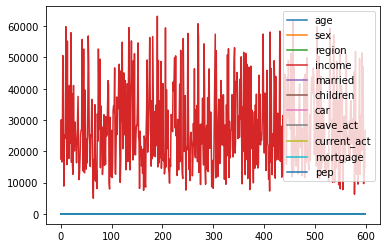

In [ ]:
diabetes_df.plot()

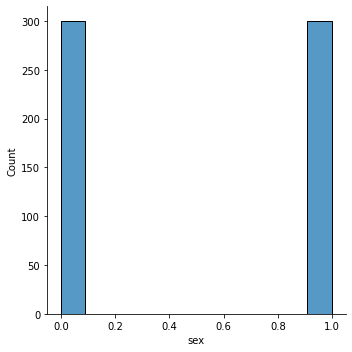

In [ ]:
sns.displot(diabetes_df['sex'])

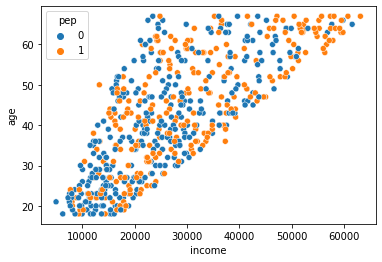

In [ ]:
sns.scatterplot(x=diabetes_df['income'],y=diabetes_df['age'],hue="pep",data=diabetes_df)

##Divided the dataset into x and y

In [ ]:
x = diabetes_df.iloc[:,0:10] #to print the x(input_values)
y = diabetes_df.iloc[:,-1] # to print the y (output_values)

In [ ]:
x.shape # to get the size of the independent value of x

(600, 10)

In [ ]:
y.shape # to get the size of the dependent value of y

(600,)

##Train_Test_Split

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=.2,train_size=.8,random_state=5)

In [ ]:
x_train.head() # to print the x_train_data

,age,sex,region,income,married,children,car,save_act,current_act,mortgage
134,66,1,3,59503.8,1,2,1,1,1,1
140,52,0,0,37095.2,1,3,0,1,1,0
116,56,1,3,21730.3,1,2,0,1,0,0
129,27,1,1,21350.3,0,0,1,1,1,0
50,24,0,3,14309.7,0,2,1,1,0,0


In [ ]:
x_train.shape # to get the train_data_size of x

(480, 10)

In [ ]:
y_train.head() # to  print the y_train_data

134    1
140    0
116    0
129    1
50     0
Name: pep, dtype: int64

In [ ]:
y_train.shape # to get the train_data_size of y

(480,)

##Algorithm

In [ ]:
model=RandomForestClassifier(max_leaf_nodes=10,criterion='gini')

In [ ]:
model.fit(x_train,y_train) # to train the algorithm  ## .values.ravel() to omit the warning

RandomForestClassifier(max_leaf_nodes=10)

In [ ]:
y_predicted = model.predict(x_test) #to test the algorithm

In [ ]:
print(y_predicted)

[1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0
 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0
 0 0 1 0 0 0 0 0 1]


##Accuracy

In [ ]:
Accuracy =accuracy_score(y_predicted,y_test)

In [ ]:
print("The accuracy of the model is:",Accuracy)

The accuracy of the model is: 0.7916666666666666


In [ ]:
from sklearn import metrics
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=4, min_samples_leaf=6)
clf_model.fit(x_train,y_train)
y_pred = clf_model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8083333333333333


In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_predicted_1 = gnb.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_1))

Accuracy: 0.6583333333333333
